In [1]:
using Plots
using DelimitedFiles: readdlm
using Interpolations
using Statistics
using LaTeXStrings

In [92]:
function read_data(N::Int,p::Float64)
    if (N==100) & (p==0.05)
        t = collect(0:0.1:3000)
    else 
        t = collect(0:0.1:1000)
    end
    M = []
    for i in 0:99
        m = readdlm( "data/p$(p)_N$(N)_$(i).txt" )
        if !any(isnan.(m))
            interpolation = linear_interpolation(m[:,1],m[:,2],extrapolation_bc=Line())(t)
            push!(M,interpolation)
        else
            println("NaNs en archivo p$(p)_N$(N)_$(i).txt")
        end
    end
    matrix_data = permutedims(hcat(M...))
    mean_data = mean(matrix_data,dims=1)
    std_data = std(matrix_data,dims=1)
    vec(mean_data)#vec(std_data)
end

read_data (generic function with 1 method)

In [93]:
# N = 100 para pruebi
N = 100
N100 = []
for p in [0.05,0.1,0.2,0.4]
    push!(N100,read_data(N,p))
end

In [172]:
t = collect(0:0.1:1000);
t2 = collect(0:0.1:3000);
p = [0.05,0.1,0.2,0.4]

plot(t2[1:15000],N100[1][1:15000] .+ 0.06,label=L"p=0.05",legendtitle=L"N=100",dpi=300)
scatter!([1000],[1],color="red",label="")

plot!(t,N100[2],label=L"p=0.10")
scatter!([465],[1],color="red",label="")

plot!(t,N100[3],label=L"p=0.20")
scatter!([140],[1],color="red",label="")

plot!(t,N100[4],label=L"p=0.40")
scatter!([70],[1],color="red",label="")

xlabel!(L"t")
ylabel!(L"m")

savefig("N100_4curves.png")

"/mnt/d/Gits/RedesComplejas_famaf/soluciones/tp6/1b/N100_4curves.png"

In [17]:
# N = 300
N = 300
N300 = []
for p in [0.05,0.1,0.2,0.4]
    push!(N300,read_data(N,p))
end

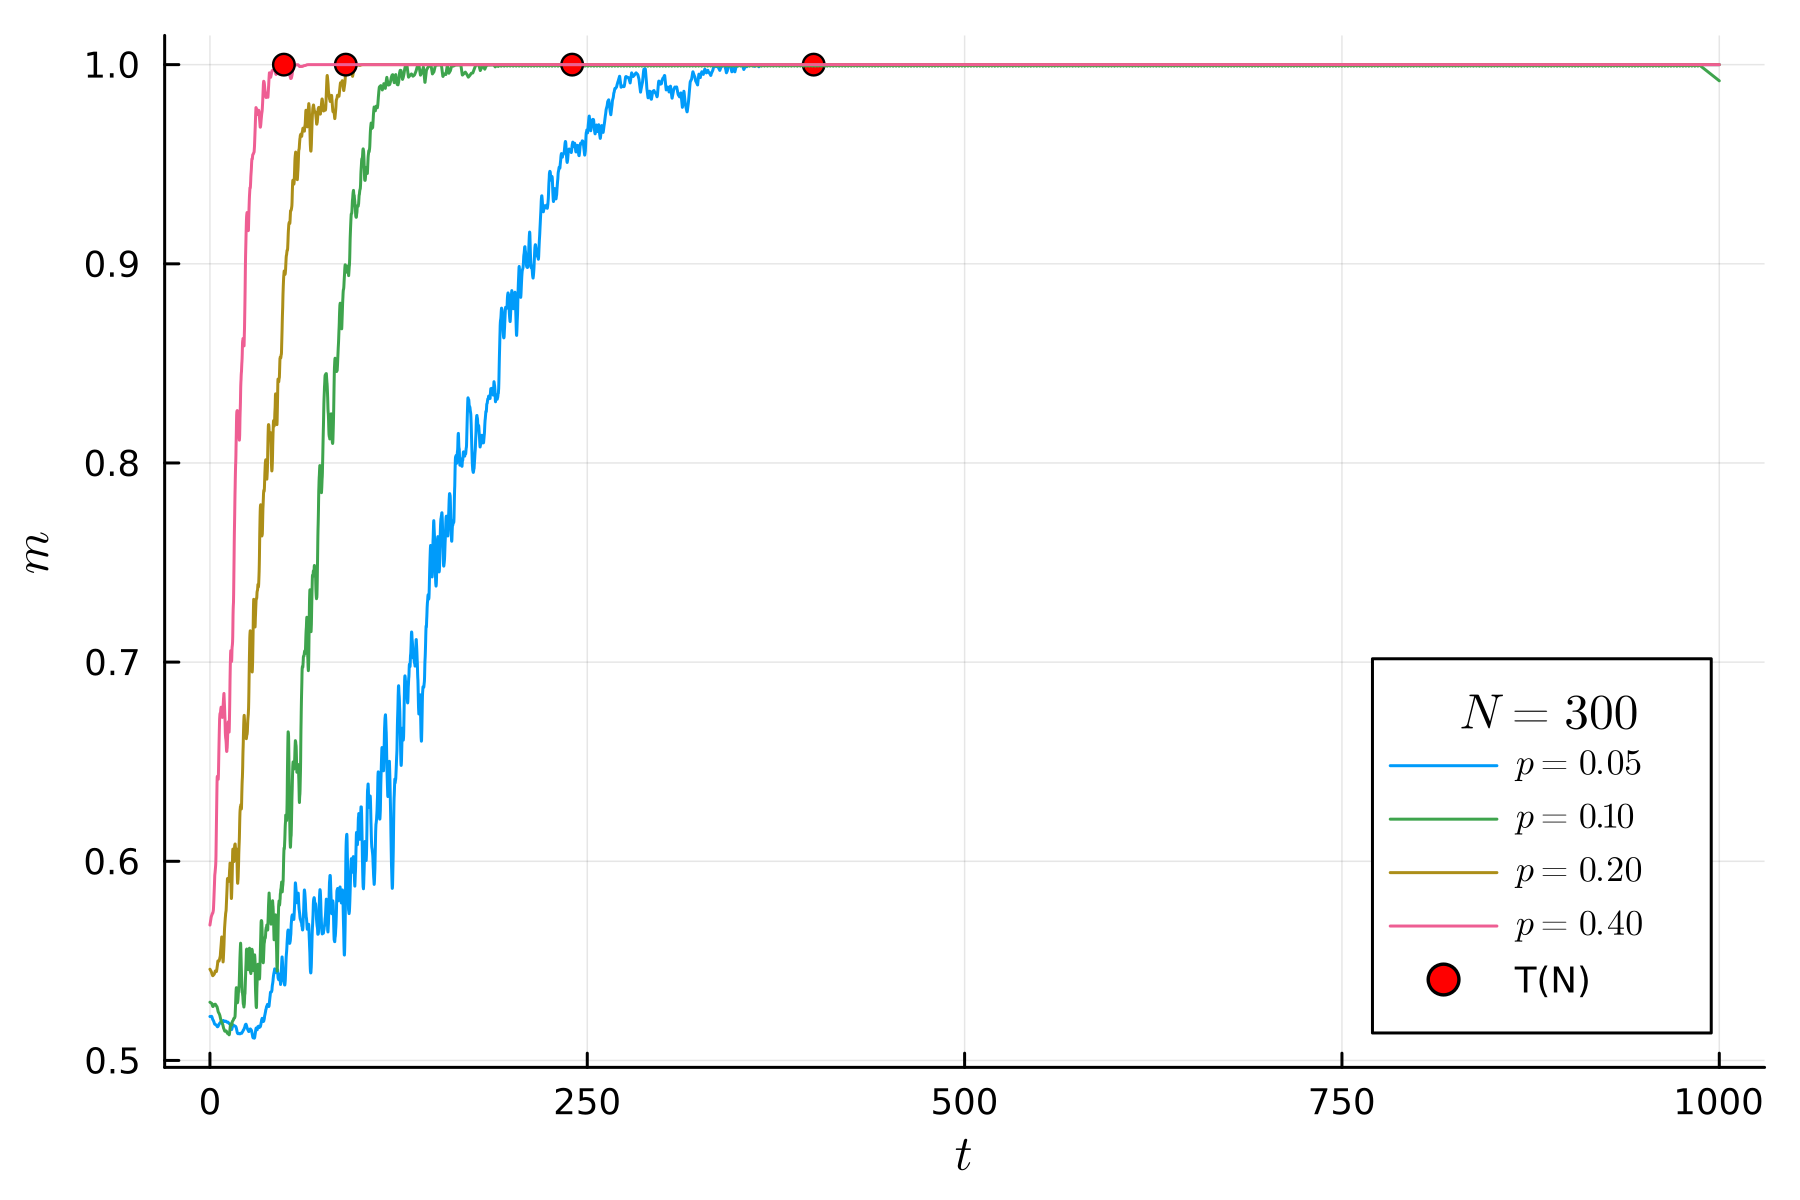

In [123]:
t = collect(0:0.1:1000);
t2 = collect(0:0.1:2000);
p = [0.05,0.1,0.2,0.4]

plot(t,N300[1],label=L"p=0.05",legendtitle=L"N=300",dpi=300)
scatter!([400],[1],color="red",label="")

plot!(t,N300[2],label=L"p=0.10")
scatter!([240],[1],color="red",label="")

plot!(t,N300[3],label=L"p=0.20")
scatter!([90],[1],color="red",label="")

plot!(t,N300[4],label=L"p=0.40")
scatter!([49],[1],color="red",label="T(N)")

xlabel!(L"t")
ylabel!(L"m")

#savefig("N300_4curves.png")

In [171]:
l(N,p) = p*(N*(N-1))/2
l_v_100 = collect(2000:1:25000)
l_v_300 = collect(200:1:2500)

N = 300
scatter([l(N,p_) for p_ in p],[440,240,90,49],xaxis=:log, yaxis=:log,label=L"N=300",dpi=300)
plot!(l_v,2041737*(l_v.^(-1.09)),label=L"\gamma_{100}=-1.08(1)")

N = 100
scatter!([l(N,p_) for p_ in p],[1000,465,140,70],xaxis=:log, yaxis=:log,label=L"N=300")
plot!(l_v_300,1520480*(l_v_300.^(-1.32)),label=L"\gamma_{300}=-1.32(1)")


xlabel!(L"p\frac{N(N-1)}{2}")

ylabel!(L"T")

savefig("twofits.png")

"/mnt/d/Gits/RedesComplejas_famaf/soluciones/tp6/1b/twofits.png"